In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor

# Load dataset
df_day = pd.read_csv('bike+sharing+dataset/day.csv')
df_hour = pd.read_csv('bike+sharing+dataset/hour.csv')

# Display the first rows of the hourly dataset


In [2]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
df_hour.cnt.mean()

189.46308763450142

In [17]:
1-40.946210289541426/df_hour.cnt.mean()

0.7838829146048125


# Check dataset information

In [3]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Get summary statistics of the dataset

In [4]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000



# Define numerical and categorical features

In [5]:
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


# Visualize categorical features using box plots

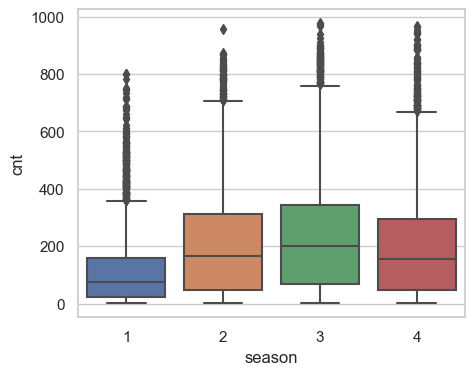

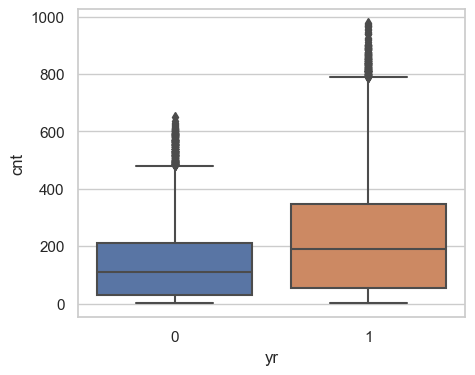

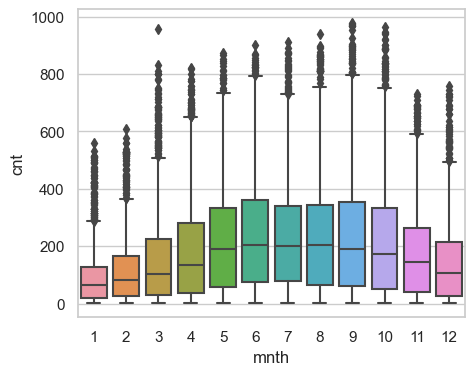

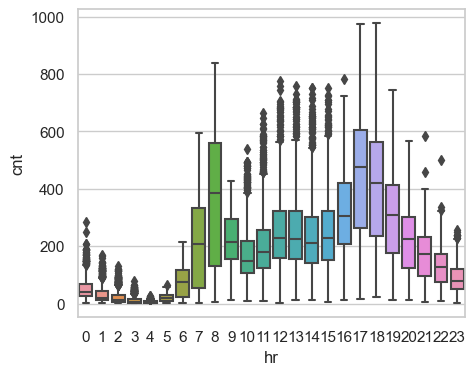

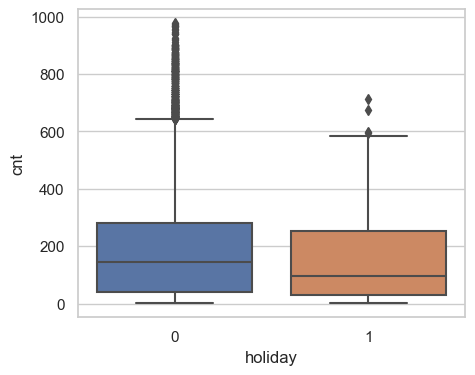

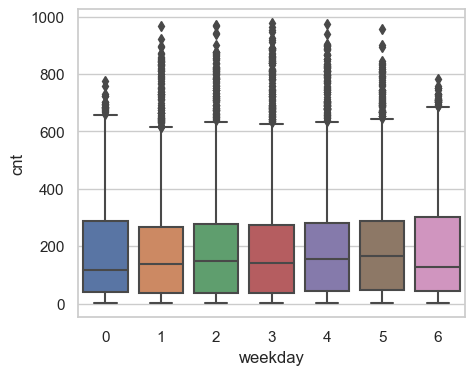

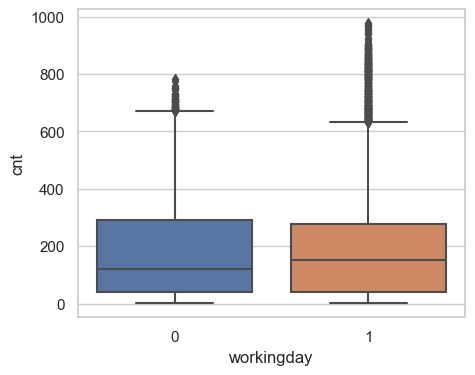

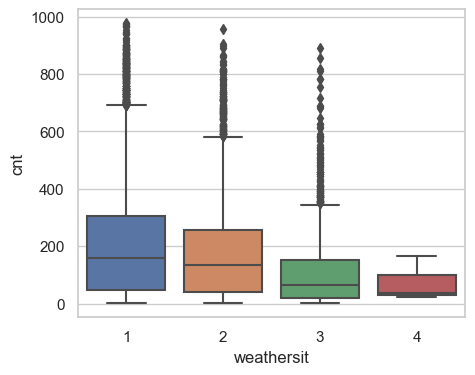

In [22]:
for item in categorical_features:
    plt.figure(figsize=(5, 4))
    #plt.xticks(rotation=45)
    sns.boxplot(data=df_hour, x=item, y='cnt')
    plt.show()


# Visualize numerical features using scatter plots

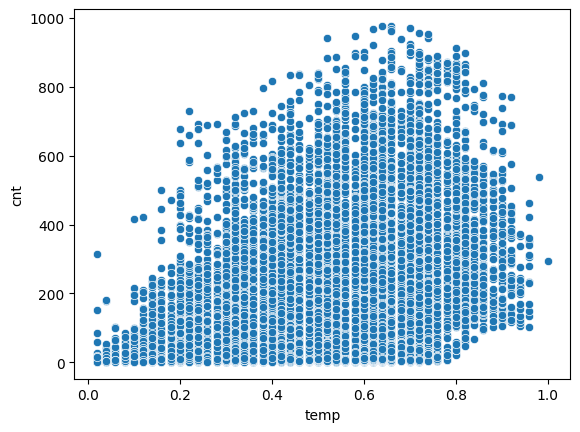

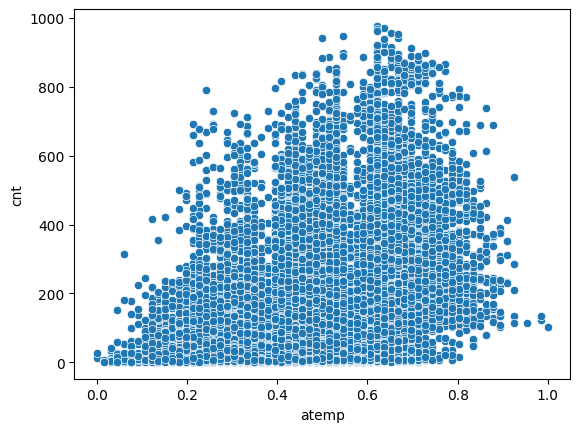

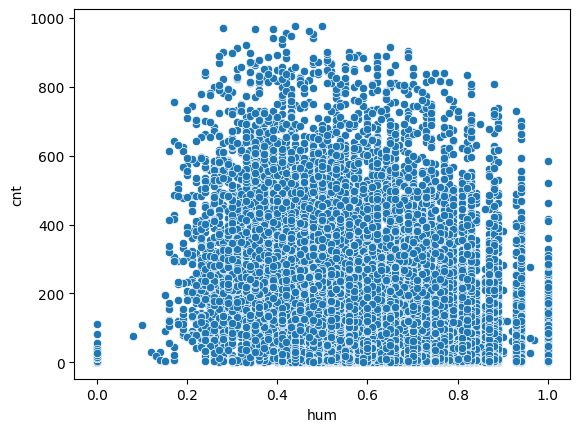

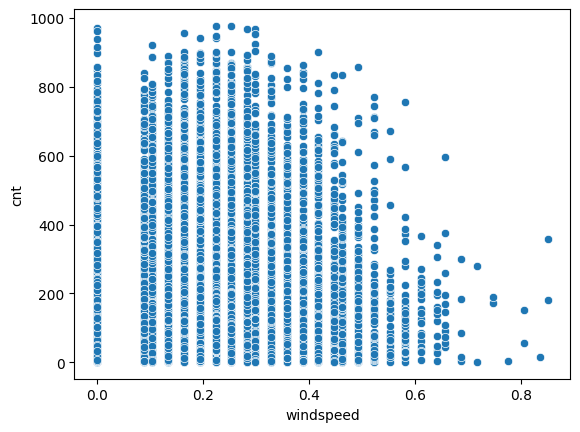

In [7]:
for item in numerical_features:
    sns.scatterplot(data=df_hour, x=item, y='cnt')
    plt.show()


# Calculate and visualize the correlation matrix

<Axes: >

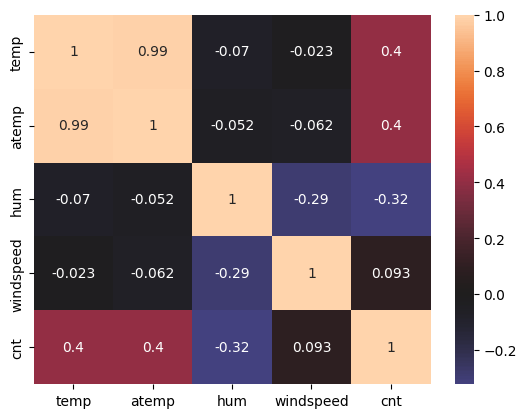

In [8]:
corr = df_hour[numerical_features + ['cnt']].corr()
sns.heatmap(corr, center=0, annot=True)

# Code to compare model performance

In [9]:
# Separate the target variable (y) from the features (X)
X = df_hour[categorical_features + numerical_features]
y = df_hour['cnt']

# Initialize a dictionary to store model evaluation results
model_evaluation = {}

# Evaluate different regression models
for model_class in [LinearRegression, LassoCV, RidgeCV, LinearSVR, XGBRegressor]:
    model = model_class()  # Initialize the regression model

    # Perform cross-validation and calculate the Mean Absolute Deviation (MAD)
    mads = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mad_mean = np.mean(mads)

    # Store the MAD for this model in the dictionary
    model_evaluation[model_class.__name__] = mad_mean

# Extract model names and their respective MADs
mod_names = list(model_evaluation.keys())
mean_abs_devs = list(model_evaluation.values())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.

In [16]:
mean_abs_devs

[110.95118831302747,
 109.26636567750089,
 110.95398640571003,
 105.05716541548483,
 40.946210289541426]


# Create a bar plot to compare model performance

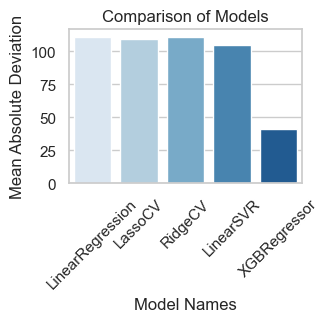

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(3, 2))


ax = sns.barplot(x=mod_names, y=mean_abs_devs, palette="Blues")

ax.set(xlabel='Model Names', ylabel='Mean Absolute Deviation', title='Comparison of Models')
plt.xticks(rotation=45)
plt.show()